# Explore Data Analysist on World Cup 2022 Matches Data

Member on this project:

|Member Name   	|Student ID   	|Contribution   	|
|---	|---	|---	|
|Nguyễn Minh Văn   	|20127094   	|   100%	|
|Dương Minh Tùng   	|20127380   	|   100%	|

## Table of Contents

**[1. Introduction](#introduction)**

**[2. Exploring data](#body1)**
  
**[3. Ask meaningful questions](#body2)**

**[4. Answer the questions](#body3)**
  * [**Question 1:** Which team has more possession of the ball will have a higher win rate?](#subbody3-1)
  * [**Question 2:** Defending or Attacking Strategy can help the team won the match?](#subbody3-2)
  * [**Question 3:** Should the player have a goal inside or outside the penalty area? Which is higher the chance to score a goal?](#subbody3-3)
  * [**Question 4:** Can we predict the match result based on previous performance?](#subbody3-4)
  
**[5. Reflection](#body4)**
  * [5.1. Nguyễn Minh Văn](#subbody4-1)
  * [5.2. Dương Minh Tùng](#subbody4-2)
  
**[6. References](#reference)**

**Library Used**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split

In [2]:
import sys
if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore")

# 1. Collecting data

### What subject is your data about? What is the source of your data?
- Our data contains all the matches of the Qatar Fifa World Cup 2022. Along with the scores and the football teams several statistics for each match were reported; for instance, assists, possession, crosses, number of red and yellow cards, passes, fouls, attempts, switches of play, offsides, and the number of times a certain are of the pitch has been crossed.
- The source of the data is belong to IRON486 - Kaggle User.
- Link of the dataset: https://www.kaggle.com/datasets/die9origephit/fifa-world-cup-2022-complete-dataset

### Do authors of this data allow you to use like this? You can check the data license
- License: Other (specified in description).
- Because this is the open dataset so it is free to use.

### How did authors collect data?
- The dataset was obtained through web scraping from www.fifa.com.
- The data were also cleaned and the unnecessary information were discarded.

In [3]:
fifa_df = pd.read_csv("Fifa_world_cup_matches.csv")

# 2. Exploring data

How many rows and how many columns?

In [4]:
print("Number of rows: "+str(fifa_df.shape[0]))
print("Number of columns: "+str(fifa_df.shape[1]))

Number of rows: 64
Number of columns: 88


What is the meaning of each row?

Each row is a match performed in the FIFA World Cup 2022

Are there duplicated rows?

In [5]:
check_dup = fifa_df.duplicated().any()
if check_dup:
    print("There are duplicated rows")
else:
    print("There is no duplicated rows")

There is no duplicated rows


As we can see, we do not have any duplicated rows here

What is the meaning of each column?

In [6]:
fifa_df.keys()

Index(['team1', 'team2', 'possession team1', 'possession team2',
       'possession in contest', 'number of goals team1',
       'number of goals team2', 'date', 'hour', 'category',
       'total attempts team1', 'total attempts team2', 'conceded team1',
       'conceded team2', 'goal inside the penalty area team1',
       'goal inside the penalty area team2',
       'goal outside the penalty area team1',
       'goal outside the penalty area team2', 'assists team1', 'assists team2',
       'on target attempts team1', 'on target attempts team2',
       'off target attempts team1', 'off target attempts team2',
       'attempts inside the penalty area team1',
       'attempts inside the penalty area  team2',
       'attempts outside the penalty area  team1',
       'attempts outside the penalty area  team2', 'left channel team1',
       'left channel team2', 'left inside channel team1',
       'left inside channel team2', 'central channel team1',
       'central channel team2', 'right in

Here is a brief explanation of each key:

 - team1: name of the first team
 - team2: name of the second team
 - possession team1: percentage of possession for the first team
 - possession team2: percentage of possession for the second team
 - possession in contest: percentage of possession in contested situations
 - number of goals team1: number of goals scored by the first team
 - number of goals team2: number of goals scored by the second team
 - date: date of the match
 - hour: start time of the match
 - category: category of the match (Group stage, Round of 16, Quarter Final, etc)
 - total attempts team1: total number of attempts by the first team
 - total attempts team2: total number of attempts by the second team
 - conceded team1: number of goals conceded by the first team
 - conceded team2: number of goals conceded by the second team
 - goal inside the penalty area team1: number of goals scored by the first team inside the penalty area
 - goal inside the penalty area team2: number of goals scored by the second team inside the penalty area
 - goal outside the penalty area team1: number of goals scored by the first team outside the penalty area
 - goal outside the penalty area team2: number of goals scored by the second team outside the penalty area
 - assists team1: number of assists by the first team
 - assists team2: number of assists by the second team
 - on target attempts team1: number of on-target attempts by the first team
 - on target attempts team2: number of on-target attempts by the second team
 - off target attempts team1: number of off-target attempts by the first team
 - off target attempts team2: number of off-target attempts by the second team
 - attempts inside the penalty area team1: number of attempts inside the penalty area by the first team
 - attempts inside the penalty area team2: number of attempts inside the penalty area by the second team
 - attempts outside the penalty area team1: number of attempts outside the penalty area by the first team
 - attempts outside the penalty area team2: number of attempts outside the penalty area by the second team
 - left channel team1: number of attempts in the left channel by the first team
 - left channel team2: number of attempts in the left channel by the second team
 - left inside channel team1: number of attempts in the left inside channel by the first team
 - left inside channel team2: number of attempts in the left inside channel by the second team
 - central channel team1: number of attempts in the central channel by the first team
 - central channel team2: number of attempts in the central channel by the second team
 - right inside channel team1: number of attempts in the right inside channel by the first team
 - right inside channel team2: number of attempts in the right inside channel by the second team
 - right channel team1: number of attempts in the right channel by the first team
 - right channel team2: number of attempts in the right channel by the second team
 - total offers to receive team1: total number of offers to receive the ball made by the first team
 - total offers to receive team2: total number of offers to receive the ball made by the second team
 - inbehind offers to receive team1: number of inbehind offers to receive the ball made by the first team
 - inbehind offers to receive team2: number of inbehind offers to receive the ball made by the second team
 - inbetween offers to receive team1: number of inbetween offers to receive the ball made by the first team
 - inbetween offers to receive team2: number of inbetween offers to receive the ball made by the second team
 - infront offers to receive team1: number of infront offers to receive the ball made by the first team
 - infront offers to receive team2: number of infront offers to receive the ball made by the second team
 - receptions between midfield and defensive lines team1: number of receptions between the midfield and defensive lines made by the first team
 - receptions between midfield and defensive lines team2: number of receptions between the midfield and defensive lines made by the second team
 - attempted line breaks team1: number of attempted line breaks by the first team
 - attempted line breaks team2: number of attempted line breaks by the second team
 - completed line breaks team1: number of completed line breaks by the first team
 - completed line breaks team2: number of completed line breaks by the second team
 - attempted defensive line breaks team1: number of attempted defensive line breaks by the first team
 - attempted defensive line breaks team2: number of attempted defensive line breaks by the second team
 - completed defensive line breaks team1: number of completed defensive line breaks by the first team
 - completed defensive line breaks team2: number of completed defensive line breaks by the second team
 - yellow cards team1: number of yellow cards received by the first team
 - yellow cards team2: number of yellow cards received by the second team
 - red cards team1: number of red cards received by the first team
 - red cards team2: number of red cards received by the second team
 - fouls against team1: number of fouls committed against the first team
 - fouls against team2: number of fouls committed against the second team
 - offsides team1: number of offsides committed by the first team
 - offsides team2: number of offsides committed by the second team
 - passes team1: number of passes made by the first team
 - passes team2: number of passes made by the second team
 - passes completed team1: number of passes completed by the first team
 - passes completed team2: number of passes completed by the second team
 - crosses team1: number of crosses made by the first team
 - crosses team2: number of crosses made by the second team
 - crosses completed team1: number of crosses completed by the first team
 - crosses completed team2: number of crosses completed by the second team
 - switches of play completed team1: number of switches of play completed by the first team
 - switches of play completed team2: number of switches of play completed by the second team
 - corners team1: number of corners won by the first team
 - corners team2: number of corners won by the second team
 - free kicks team1: number of free kicks won by the first team
 - free kicks team2: number of free kicks won by the second team
 - penalties scored team1: number of penalties scored by the first team
 - penalties scored team2: number of penalties scored by the second team
 - goal preventions team1: number of goal preventions made by the first team
 - goal preventions team2: number of goal preventions made by the second team
 - own goals team1: number of own goals scored by the first team
 - own goals team2: number of own goals scored by the second team
 - forced turnovers team1: number of turnovers forced by the first team
 - forced turnovers team2: number of turnovers forced by the second team
 - defensive pressures applied team1: number of defensive pressures applied by the first team
 - defensive pressures applied team2: number of defensive pressures applied by the second team

What is the current data type of each column? Are there columns having inappropriate data types?

In [7]:
fifa_df.dtypes

team1                                object
team2                                object
possession team1                     object
possession team2                     object
possession in contest                object
                                      ...  
own goals team2                       int64
forced turnovers team1                int64
forced turnovers team2                int64
defensive pressures applied team1     int64
defensive pressures applied team2     int64
Length: 88, dtype: object

**With each numerical column, how are values distributed?**

We check if there are any missing data in the dataframe:

In [8]:
col_key = list(fifa_df.keys())
percent_missing = fifa_df[col_key].isnull().sum() * 100 / len(fifa_df)
percent_missing

team1                                0.0
team2                                0.0
possession team1                     0.0
possession team2                     0.0
possession in contest                0.0
                                    ... 
own goals team2                      0.0
forced turnovers team1               0.0
forced turnovers team2               0.0
defensive pressures applied team1    0.0
defensive pressures applied team2    0.0
Length: 88, dtype: float64

So the this data is not missing at any value. Let's check min and max of numeric column:

In [9]:
df1 = fifa_df[['team1', 'team2','date','hour','category']]
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64'] 
df2 = fifa_df.select_dtypes(include=numerics)
df2

,number of goals team1,number of goals team2,total attempts team1,total attempts team2,conceded team1,conceded team2,goal inside the penalty area team1,goal inside the penalty area team2,goal outside the penalty area team1,goal outside the penalty area team2,...,penalties scored team1,penalties scored team2,goal preventions team1,goal preventions team2,own goals team1,own goals team2,forced turnovers team1,forced turnovers team2,defensive pressures applied team1,defensive pressures applied team2
0,0,2,5,6,2,0,0,2,0,0,...,0,1,6,5,0,0,52,72,256,279
1,6,2,13,8,2,6,6,2,0,0,...,0,1,8,13,0,0,63,72,139,416
2,0,2,14,9,2,0,0,2,0,0,...,0,0,9,15,0,0,63,73,263,251
3,1,1,6,7,1,1,1,1,0,0,...,0,1,7,7,0,0,81,72,242,292
4,1,2,14,3,2,1,1,2,0,0,...,1,0,4,14,0,0,65,80,163,361
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,1,2,14,9,2,1,1,1,0,1,...,1,0,9,15,0,0,49,54,193,308
60,3,0,10,12,0,3,3,0,0,0,...,1,0,12,10,0,0,85,63,321,260
61,2,0,14,13,0,2,2,0,0,0,...,0,0,13,14,0,0,72,47,328,218
62,2,1,14,7,1,2,2,1,0,0,...,0,0,7,14,0,0,75,72,288,277


In [10]:
fifa_df.describe()

,number of goals team1,number of goals team2,total attempts team1,total attempts team2,conceded team1,conceded team2,goal inside the penalty area team1,goal inside the penalty area team2,goal outside the penalty area team1,goal outside the penalty area team2,...,penalties scored team1,penalties scored team2,goal preventions team1,goal preventions team2,own goals team1,own goals team2,forced turnovers team1,forced turnovers team2,defensive pressures applied team1,defensive pressures applied team2
count,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,...,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000
mean,1.578125,1.109375,11.140625,11.281250,1.109375,1.578125,1.468750,0.984375,0.093750,0.109375,...,0.140625,0.125000,11.593750,11.359375,0.015625,0.015625,71.968750,70.125000,289.750000,293.265625
std,1.551289,1.055856,4.972519,5.807682,1.055856,1.551289,1.563155,0.999876,0.293785,0.314576,...,0.350382,0.377964,5.911299,4.990045,0.125000,0.125000,14.394629,13.531269,88.406888,80.916230
min,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,38.000000,44.000000,139.000000,141.000000
25%,0.000000,0.000000,8.000000,7.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,7.750000,8.000000,0.000000,0.000000,63.000000,60.250000,229.000000,233.750000
50%,1.000000,1.000000,10.000000,10.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,11.000000,10.000000,0.000000,0.000000,71.000000,72.000000,281.000000,292.500000
75%,2.000000,2.000000,14.000000,14.000000,2.000000,2.000000,2.000000,2.000000,0.000000,0.000000,...,0.000000,0.000000,14.000000,14.000000,0.000000,0.000000,83.500000,79.000000,328.000000,327.500000
max,7.000000,4.000000,25.000000,32.000000,4.000000,7.000000,7.000000,4.000000,1.000000,1.000000,...,1.000000,2.000000,32.000000,26.000000,1.000000,1.000000,101.000000,104.000000,637.000000,585.000000


Split Data to multiple Dataframe for a better view

In [11]:
possession_df = fifa_df[['team1', 'team2', 'possession team1', 'possession team2',
       'possession in contest']]
goal_and_assist_df = fifa_df[['number of goals team1',
       'number of goals team2','penalties scored team1', 'penalties scored team2','own goals team1',
       'own goals team2','goal inside the penalty area team1',
       'goal inside the penalty area team2',
       'goal outside the penalty area team1',
       'goal outside the penalty area team2', 'assists team1', 'assists team2']]
attemps_df = fifa_df[['total attempts team1','total attempts team2', 'conceded team1',
       'conceded team2','on target attempts team1', 'on target attempts team2',
       'off target attempts team1', 'off target attempts team2',
       'attempts inside the penalty area team1',
       'attempts inside the penalty area  team2',
       'attempts outside the penalty area  team1',
       'attempts outside the penalty area  team2']]
offers_df = fifa_df[['total offers to receive team1', 'total offers to receive team2', 'inbehind offers to receive team1',
       'inbehind offers to receive team2', 'inbetween offers to receive team1',
       'inbetween offers to receive team2', 'infront offers to receive team1',
       'infront offers to receive team2',
       'receptions between midfield and defensive lines team1',
       'receptions between midfield and defensive lines team2',
       'attempted line breaks team1', 'attempted line breaks team2',
       'completed line breaksteam1', 'completed line breaks team2',
       'attempted defensive line breaks team1',
       'attempted defensive line breaks team2',
       'completed defensive line breaksteam1',
       'completed defensive line breaks team2']]
defend_df = fifa_df[['goal preventions team1', 'goal preventions team2', 'own goals team1',
       'own goals team2', 'forced turnovers team1', 'forced turnovers team2',
       'defensive pressures applied team1',
       'defensive pressures applied team2']]
foul_df = fifa_df[['yellow cards team1',
       'yellow cards team2', 'red cards team1', 'red cards team2',
       'fouls against team1', 'fouls against team2', 'offsides team1',
       'offsides team2']]
other_df = fifa_df[['passes team1', 'passes team2',
       'passes completed team1', 'passes completed team2', 'crosses team1',
       'crosses team2', 'crosses completed team1', 'crosses completed team2',
       'switches of play completed team1', 'switches of play completed team2',
       'corners team1', 'corners team2', 'free kicks team1',
       'free kicks team2']]

In [12]:
goal_and_assist_df.describe()

,number of goals team1,number of goals team2,penalties scored team1,penalties scored team2,own goals team1,own goals team2,goal inside the penalty area team1,goal inside the penalty area team2,goal outside the penalty area team1,goal outside the penalty area team2,assists team1,assists team2
count,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000
mean,1.578125,1.109375,0.140625,0.125000,0.015625,0.015625,1.468750,0.984375,0.093750,0.109375,1.171875,0.734375
std,1.551289,1.055856,0.350382,0.377964,0.125000,0.125000,1.563155,0.999876,0.293785,0.314576,1.363407,0.895176
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000
75%,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,2.000000,2.000000,0.000000,0.000000,2.000000,1.000000
max,7.000000,4.000000,1.000000,2.000000,1.000000,1.000000,7.000000,4.000000,1.000000,1.000000,6.000000,4.000000


In [13]:
attemps_df.describe()

,total attempts team1,total attempts team2,conceded team1,conceded team2,on target attempts team1,on target attempts team2,off target attempts team1,off target attempts team2,attempts inside the penalty area team1,attempts inside the penalty area team2,attempts outside the penalty area team1,attempts outside the penalty area team2
count,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.00000,64.000000,64.000000,64.000000
mean,11.140625,11.281250,1.109375,1.578125,4.203125,3.750000,4.703125,5.031250,6.93750,6.953125,4.203125,4.328125
std,4.972519,5.807682,1.055856,1.551289,2.527184,2.713868,2.394966,2.911219,3.77912,4.459446,2.470009,2.766321
min,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
25%,8.000000,7.750000,0.000000,0.000000,3.000000,2.000000,3.000000,3.000000,4.00000,4.000000,3.000000,3.000000
50%,10.000000,10.000000,1.000000,1.000000,4.000000,3.000000,4.000000,5.000000,6.00000,6.000000,4.000000,4.000000
75%,14.000000,14.000000,2.000000,2.000000,6.000000,5.000000,6.250000,6.250000,9.25000,9.000000,5.000000,5.000000
max,25.000000,32.000000,4.000000,7.000000,10.000000,13.000000,11.000000,17.000000,18.00000,24.000000,13.000000,15.000000


In [14]:
offers_df.describe()

,total offers to receive team1,total offers to receive team2,inbehind offers to receive team1,inbehind offers to receive team2,inbetween offers to receive team1,inbetween offers to receive team2,infront offers to receive team1,infront offers to receive team2,receptions between midfield and defensive lines team1,receptions between midfield and defensive lines team2,attempted line breaks team1,attempted line breaks team2,completed line breaksteam1,completed line breaks team2,attempted defensive line breaks team1,attempted defensive line breaks team2,completed defensive line breaksteam1,completed defensive line breaks team2
count,64.00000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.00000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000
mean,592.37500,550.218750,126.375000,119.625000,231.500000,212.859375,234.500000,217.734375,11.406250,10.500000,173.46875,166.593750,114.250000,106.484375,18.484375,18.265625,10.156250,9.718750
std,170.21084,169.487694,33.776812,36.660822,70.466698,59.487191,85.887893,101.472843,6.920682,5.614607,32.77822,27.965806,33.217895,27.795736,7.144744,6.183034,5.771354,5.202163
min,302.00000,212.000000,62.000000,52.000000,99.000000,86.000000,75.000000,68.000000,1.000000,1.000000,104.00000,101.000000,55.000000,45.000000,4.000000,4.000000,1.000000,0.000000
25%,465.75000,439.000000,100.000000,95.750000,176.750000,176.000000,173.500000,159.750000,8.000000,7.000000,150.75000,149.250000,90.500000,86.750000,13.000000,14.750000,7.000000,7.000000
50%,611.50000,544.000000,125.500000,115.500000,232.000000,207.500000,235.500000,196.500000,10.000000,9.000000,171.50000,167.000000,111.000000,99.000000,17.000000,17.000000,8.000000,9.000000
75%,696.00000,640.750000,152.250000,137.000000,275.250000,261.250000,286.000000,259.000000,15.000000,14.000000,193.00000,185.000000,134.250000,123.250000,23.000000,22.000000,12.250000,12.000000
max,1085.00000,1138.000000,207.000000,217.000000,418.000000,360.000000,487.000000,678.000000,43.000000,28.000000,276.00000,241.000000,233.000000,188.000000,39.000000,37.000000,27.000000,25.000000


In [15]:
defend_df.describe()

,goal preventions team1,goal preventions team2,own goals team1,own goals team2,forced turnovers team1,forced turnovers team2,defensive pressures applied team1,defensive pressures applied team2
count,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000
mean,11.593750,11.359375,0.015625,0.015625,71.968750,70.125000,289.750000,293.265625
std,5.911299,4.990045,0.125000,0.125000,14.394629,13.531269,88.406888,80.916230
min,0.000000,2.000000,0.000000,0.000000,38.000000,44.000000,139.000000,141.000000
25%,7.750000,8.000000,0.000000,0.000000,63.000000,60.250000,229.000000,233.750000
50%,11.000000,10.000000,0.000000,0.000000,71.000000,72.000000,281.000000,292.500000
75%,14.000000,14.000000,0.000000,0.000000,83.500000,79.000000,328.000000,327.500000
max,32.000000,26.000000,1.000000,1.000000,101.000000,104.000000,637.000000,585.000000


In [16]:
foul_df.describe()

,yellow cards team1,yellow cards team2,red cards team1,red cards team2,fouls against team1,fouls against team2,offsides team1,offsides team2
count,64.000000,64.000000,64.000000,64.0,64.000000,64.000000,64.000000,64.000000
mean,1.781250,1.750000,0.062500,0.0,12.640625,12.359375,1.968750,1.968750
std,1.740906,1.511858,0.243975,0.0,5.247425,3.789573,1.727175,1.727175
min,0.000000,0.000000,0.000000,0.0,3.000000,5.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.0,9.000000,10.000000,1.000000,0.750000
50%,1.500000,2.000000,0.000000,0.0,13.000000,12.000000,2.000000,2.000000
75%,3.000000,2.000000,0.000000,0.0,15.000000,14.250000,3.000000,3.000000
max,8.000000,8.000000,1.000000,0.0,30.000000,24.000000,10.000000,7.000000


In [17]:
other_df.describe()

,passes team1,passes team2,passes completed team1,passes completed team2,crosses team1,crosses team2,crosses completed team1,crosses completed team2,switches of play completed team1,switches of play completed team2,corners team1,corners team2,free kicks team1,free kicks team2
count,64.000000,64.000000,64.0000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000
mean,509.515625,492.109375,437.0000,419.890625,18.093750,18.531250,4.593750,4.078125,6.453125,6.156250,4.484375,4.453125,14.093750,14.390625
std,156.348511,166.213681,156.9237,165.710028,8.239893,7.195609,3.298478,2.269918,3.749835,3.432888,2.777416,2.794153,4.219075,5.202616
min,225.000000,224.000000,167.0000,154.000000,4.000000,5.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,6.000000,5.000000
25%,392.750000,392.250000,318.2500,317.500000,11.750000,13.000000,2.750000,2.750000,4.000000,3.000000,2.000000,2.000000,11.000000,11.000000
50%,508.000000,466.000000,437.0000,396.500000,19.000000,18.000000,4.000000,4.000000,6.000000,6.000000,4.500000,4.000000,14.000000,14.500000
75%,594.500000,571.000000,523.0000,498.250000,23.000000,22.250000,6.000000,5.000000,9.000000,8.250000,6.000000,6.000000,16.000000,17.000000
max,1061.000000,1070.000000,1003.0000,992.000000,46.000000,38.000000,17.000000,12.000000,18.000000,14.000000,12.000000,14.000000,27.000000,30.000000


# 3. Ask the meaningful questions
We propose 4 questions:

- Question 1: Which team has more possession of the ball will have a higher win rate?
- Question 2: Defending or Attacking Strategy can help the team won the match?
- Question 3: Should the player have a goal inside or outside the penalty area? Which is higher the chance to score a goal?
- Question 4: Can we predict the match result based on previous performance?

# 4. Answering the questions

## a. Which team has more possession of the ball will have a higher win rate?

In [18]:
ques_a_df = fifa_df[['team1', 'team2', 'possession team1', 'possession team2',
       'possession in contest','number of goals team1',
       'number of goals team2']]
ques_a_df['Result'] = np.where(ques_a_df['number of goals team1'] > ques_a_df['number of goals team2'], 1, np.where(ques_a_df['number of goals team1'] < ques_a_df['number of goals team2'], 2, 0))

In [19]:
ques_a_df['Possession'] = np.where(ques_a_df['possession team1'] > ques_a_df['possession team2'], 1, np.where(ques_a_df['possession team1'] < ques_a_df['possession team2'], 2, 0))

We count the different if a team had higher possesion but not won the match. 1 is the value that in that match, the team had a higher possession won the match and vice versa.

In [20]:
ques_a_df['different'] = np.where(ques_a_df['Result'] == ques_a_df['Possession'], 1, 0)

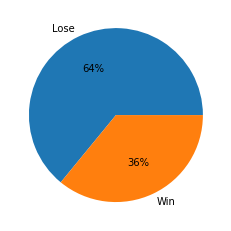

In [21]:
val_count = ques_a_df['different'].value_counts()
y = np.array([val_count[0], val_count[1]])
mylabels = ["Lose", "Win"]
plt.pie(y, labels = mylabels, autopct='%1.0f%%')
plt.show() 

As we can see, there is only 36% matches that the team had higher possession won that match, so possession is not the key to won a World Cup 2022 game. Then, we will see which team win with higher possession.

In [22]:
new_ps = ques_a_df[ques_a_df['different']==1]
new_ps['Winner'] = np.where(new_ps['Result'] == 2, new_ps['team2'], np.where(new_ps['Result'] == 1, new_ps['team1'], np.nan))
new_ps['Winner'].value_counts()

ENGLAND          3
BRAZIL           3
ARGENTINA        3
NETHERLANDS      2
FRANCE           2
PORTUGAL         2
ECUADOR          1
SPAIN            1
BELGIUM          1
SENEGAL          1
UNITED STATES    1
MEXICO           1
GERMANY          1
Name: Winner, dtype: int64

## Conclusion:
There are only 13 team that can win with higher possession. So, there are lots of team have the ball under control in higher time but cannot won the match.

## b. Defending or Attacking Strategy can help the team won the match?

Would the team with more attempts won the match or the team had more defensive pressures won the match

First, we will try to find the percentage of goal from the attempts in a match.

In [23]:
ques_b_df = ques_a_df.drop(['possession team1', 'possession team2',
       'possession in contest','Possession','different'], axis=1)
ques_b_df = pd.concat([ques_b_df, attemps_df[['total attempts team1','total attempts team2']]], axis=1)
ques_b_df['Goal Percent 1'] = ques_b_df['number of goals team1'] / ques_b_df['total attempts team1']
ques_b_df['Goal Percent 2'] = ques_b_df['number of goals team2'] / ques_b_df['total attempts team2']
ques_b_df[['Goal Percent 1','Goal Percent 2']].describe()

,Goal Percent 1,Goal Percent 2
count,64.000000,63.000000
mean,0.147095,0.113089
std,0.133792,0.123844
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.125000,0.090909
75%,0.205556,0.184659
max,0.500000,0.666667


The percentage of an attempts to be a goal is from 0~0.2. Therefore, it is hard to have a goal. So, did the team have higher attempts can have more goals?

We will find the number of match that have a higher attempts team won the match, mark those are 1, and the others are 0.

In [24]:
ques_b_df['attempts higher'] = np.where(ques_b_df['total attempts team1'] > ques_b_df['total attempts team2'], 1, np.where(ques_b_df['total attempts team1'] < ques_b_df['total attempts team2'], 2, 0))
ques_b_df['goal from attempts'] = np.where(ques_b_df['Result'] == ques_b_df['attempts higher'], 1, 0)
ques_b_df['goal from attempts'].value_counts()

1    32
0    32
Name: goal from attempts, dtype: int64

There is a balance in here, the teams had higher attempts may won or lose the match, It's not depend on the attempts they made. So, how about the pressure of defends, can the team with more defensive pressure and force turnover won the match?

First of all, we will see the matches

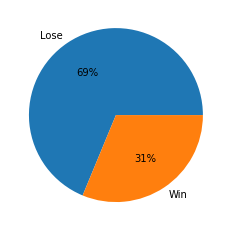

In [25]:
ques_b_df['Preventions'] = np.where(defend_df['goal preventions team1'] > defend_df['goal preventions team2'], 1, np.where(defend_df['goal preventions team1'] < defend_df['goal preventions team2'], 2, 0))

ques_b_df['different'] = np.where(ques_b_df['Result'] == ques_b_df['Preventions'], 1, 0)
y = np.array([ques_b_df['different'].value_counts()[0], ques_b_df['different'].value_counts()[1]])
mylabels = ["Lose", "Win"]
plt.pie(y, labels = mylabels, autopct='%1.0f%%')
plt.show() 

As we can see, there is only 31% matches that the team had higher preventions won that match, so preventions is not the key to won a World Cup 2022 game. Then, we will see which team win with higher preventions.

In [26]:
b_ps = ques_b_df[ques_b_df['different']==1]
b_ps['Winner'] = np.where(b_ps['Result'] == 2, b_ps['team2'], np.where(b_ps['Result'] == 1, b_ps['team1'], np.nan))
b_ps['Winner'].value_counts()

NETHERLANDS       2
JAPAN             2
AUSTRALIA         2
SAUDI ARABIA      1
BELGIUM           1
POLAND            1
COSTA RICA        1
GHANA             1
TUNISIA           1
KOREA REPUBLIC    1
CAMEROON          1
ENGLAND           1
MOROCCO           1
FRANCE            1
ARGENTINA         1
Name: Winner, dtype: int64

There are only 15 teams that can win with higher goal preventions.

In [27]:
ques_b_df['Force Turnover'] = np.where(defend_df['forced turnovers team1'] > defend_df['forced turnovers team2'], 1, np.where(defend_df['forced turnovers team1'] < defend_df['forced turnovers team2'], 2, 0))

ques_b_df['differentFT'] = np.where(ques_b_df['Result'] == ques_b_df['Force Turnover'], 1, 0)
ques_b_df['differentFT'].value_counts()

1    34
0    30
Name: differentFT, dtype: int64

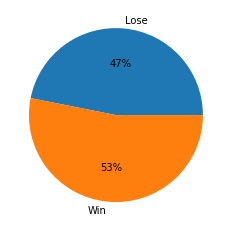

In [28]:
y = np.array([ques_b_df['differentFT'].value_counts()[0], ques_b_df['differentFT'].value_counts()[1]])
mylabels = ["Win", "Lose"]
y = np.array([ques_b_df['differentFT'].value_counts()[0], ques_b_df['differentFT'].value_counts()[1]])
mylabels = ["Lose", "Win"]
plt.pie(y, labels = mylabels, autopct='%1.0f%%')
plt.show() 


Up to 30/64 matches were won when the team had a higher Force Turnover.

In [29]:
bFT_ps = ques_b_df[ques_b_df['differentFT']==1]
bFT_ps['Winner'] = np.where(bFT_ps['Result'] == 2, bFT_ps['team2'], np.where(bFT_ps['Result'] == 1, bFT_ps['team1'], np.nan))
bFT_ps['Winner'].value_counts()

FRANCE            5
MOROCCO           3
NETHERLANDS       3
JAPAN             2
BRAZIL            2
AUSTRALIA         2
CROATIA           2
ENGLAND           1
PORTUGAL          1
CAMEROON          1
SWITZERLAND       1
KOREA REPUBLIC    1
UNITED STATES     1
ECUADOR           1
SENEGAL           1
GHANA             1
COSTA RICA        1
POLAND            1
BELGIUM           1
SAUDI ARABIA      1
ARGENTINA         1
Name: Winner, dtype: int64

Up to 21 teams have won when playing pressing to make opponents have a mistake, an impressive number

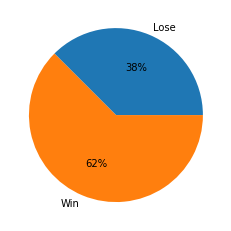

1    40
0    24
Name: differentP, dtype: int64


In [30]:
ques_b_df['Pressure'] = np.where(defend_df['defensive pressures applied team1'] > defend_df['defensive pressures applied team2'], 1, np.where(defend_df['defensive pressures applied team1'] < defend_df['defensive pressures applied team2'], 2, 0))

ques_b_df['differentP'] = np.where(ques_b_df['Result'] == ques_b_df['Pressure'], 1, np.where(ques_b_df['Result'] == 0, 1, 0))
# val_count = ques_b_df['differentP'].value_counts()
y = np.array([ques_b_df['differentP'].value_counts()[0], ques_b_df['differentP'].value_counts()[1]])
mylabels = ["Lose", "Win"]
plt.pie(y, labels = mylabels, autopct='%1.0f%%')
plt.show() 
print(ques_b_df['differentP'].value_counts())

About the defensive pressures, there are 62% matches which the team has higher rate won points.

In [31]:
bP_ps = ques_b_df[ques_b_df['differentP']==1]
bP_ps['Winner'] = np.where(bP_ps['Result'] == 2, bP_ps['team2'], np.where(bP_ps['Result'] == 1, bP_ps['team1'], np.nan))
bP_ps['Winner'].value_counts()

MOROCCO           3
JAPAN             2
FRANCE            2
AUSTRALIA         2
CROATIA           2
ECUADOR           1
URUGUAY           1
PORTUGAL          1
NETHERLANDS       1
CAMEROON          1
KOREA REPUBLIC    1
SENEGAL           1
TUNISIA           1
UNITED STATES     1
SAUDI ARABIA      1
GHANA             1
POLAND            1
IRAN              1
ARGENTINA         1
Name: Winner, dtype: int64

There are 19 teams that win by taking higher defensive action against their opponents.


## Conclusion:
So we can see, the application of defensive play, taking defensive actions, preventing the opponent's shot effort in this 2022 World Cup has greatly affected the results of the matches, and many teams also win more when they actively play defensively.

## c. Should the player have a goal inside or outside the penalty area? Which is higher the chance to score a goal?

This question helps us to know more about the place for a player to score a goal.

In [32]:
ques_c_df = fifa_df[['goal inside the penalty area team1','goal inside the penalty area team2', 'goal outside the penalty area team1', 'goal outside the penalty area team2', 'attempts inside the penalty area team1',
       'attempts inside the penalty area  team2',
       'attempts outside the penalty area  team1',
       'attempts outside the penalty area  team2']]
ques_c_df['inside'] = (ques_c_df['goal inside the penalty area team1'] + ques_c_df['goal inside the penalty area team2']) / (ques_c_df['attempts inside the penalty area team1'] + ques_c_df['attempts inside the penalty area  team2'])
ques_c_df['outside'] =(ques_c_df['goal outside the penalty area team1'] + ques_c_df['goal outside the penalty area team2']) / (ques_c_df['attempts outside the penalty area  team1'] + ques_c_df['attempts outside the penalty area  team2'])

We will use the Box Plot to visualize the data for easier to catch up 

{'whiskers': [<matplotlib.lines.Line2D at 0x277760ba320>,
 'caps': [<matplotlib.lines.Line2D at 0x2777822f490>,
 'boxes': [<matplotlib.lines.Line2D at 0x2777606b6a0>,
 'medians': [<matplotlib.lines.Line2D at 0x2777822fa30>,
 'fliers': [<matplotlib.lines.Line2D at 0x2777822fd00>,
 'means': []}

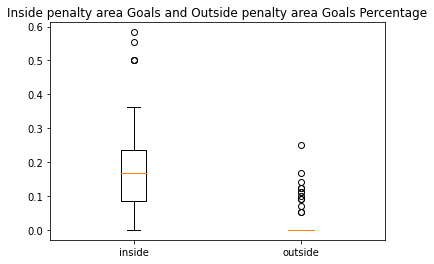

In [33]:
fig1, ax1 = plt.subplots()
ax1.set_title('Inside penalty area Goals and Outside penalty area Goals Percentage')
ax1.boxplot(ques_c_df[['inside', 'outside']], labels=['inside', 'outside'])

## Conclusion
From this Box Plot, we can see that it is obviously that players can score more goals when shooting inside the penalty area.

## d. Can we predict the match result based on previous performance?

First, we will choose the data to train for the model

In [34]:
fifa_df['winner'] = np.where(fifa_df['number of goals team1'] > fifa_df['number of goals team2'], 1, np.where(fifa_df['number of goals team1'] < fifa_df['number of goals team2'], 2, 0))
data_per_team_1 = fifa_df[['team1', 'number of goals team1', 
                       'total attempts team1', 'forced turnovers team1',
                       'defensive pressures applied team1',
                       'attempted defensive line breaks team1',
       'completed defensive line breaksteam1','passes team1',
       'passes completed team1', 'winner']]

data_per_team_1['won1'] = np.where(data_per_team_1['winner'] == 1, 1, np.where(data_per_team_1['winner'] == 2, 0, 2))
data_per_team_1['goal percent1'] = data_per_team_1['number of goals team1'] / data_per_team_1['total attempts team1']
data_per_team_1['defensive pressures completed1'] = data_per_team_1['forced turnovers team1'] / data_per_team_1['defensive pressures applied team1']
data_per_team_1['defensive line breaks completed1'] = data_per_team_1['completed defensive line breaksteam1'] / data_per_team_1['attempted defensive line breaks team1']
data_per_team_1['pass percent1'] = data_per_team_1['passes completed team1'] / data_per_team_1['passes team1']
data_per_team_1 = data_per_team_1.drop(['number of goals team1', 
                       'total attempts team1', 'forced turnovers team1',
                       'defensive pressures applied team1',
                       'attempted defensive line breaks team1',
       'completed defensive line breaksteam1','passes team1',
       'passes completed team1', 'winner'], axis=1)
data_per_team_2 = fifa_df[['team2', 'number of goals team2', 
                       'total attempts team2', 'forced turnovers team2',
                       'defensive pressures applied team2',
                       'attempted defensive line breaks team2',
       'completed defensive line breaks team2','passes team2',
       'passes completed team2', 'winner']]
data_per_team_2['won2'] = np.where(data_per_team_2['winner'] == 2, 1, np.where(data_per_team_2['winner'] == 1, 0, 2))
data_per_team_2['goal percent2'] = data_per_team_2['number of goals team2'] / data_per_team_2['total attempts team2']
data_per_team_2['defensive pressures completed2'] = data_per_team_2['forced turnovers team2'] / data_per_team_2['defensive pressures applied team2']
data_per_team_2['defensive line breaks completed2'] = data_per_team_2['completed defensive line breaks team2'] / data_per_team_2['attempted defensive line breaks team2'] 
data_per_team_2['pass percent2'] = data_per_team_2['passes completed team2'] / data_per_team_2['passes team2']
data_per_team_2 = data_per_team_2.drop(['number of goals team2', 
                       'total attempts team2', 'forced turnovers team2',
                       'defensive pressures applied team2',
                       'attempted defensive line breaks team2',
       'completed defensive line breaks team2','passes team2',
       'passes completed team2', 'winner'], axis=1)
data_merge = pd.merge_asof(data_per_team_1, data_per_team_2, left_index=True, right_index=True)

Here is the data after preprocessing

In [35]:
data_merge.head()

,team1,won1,goal percent1,defensive pressures completed1,defensive line breaks completed1,pass percent1,team2,won2,goal percent2,defensive pressures completed2,defensive line breaks completed2,pass percent2
0,QATAR,0,0.000000,0.203125,0.444444,0.846667,ECUADOR,1,0.333333,0.258065,0.538462,0.852083
1,ENGLAND,1,0.461538,0.453237,0.640000,0.902349,IRAN,0,0.250000,0.173077,0.571429,0.687500
2,SENEGAL,0,0.000000,0.239544,0.681818,0.817232,NETHERLANDS,1,0.222222,0.290837,0.454545,0.853881
3,UNITED STATES,2,0.166667,0.334711,0.652174,0.894552,WALES,2,0.142857,0.246575,0.470588,0.784841
4,ARGENTINA,0,0.071429,0.398773,0.641026,0.867213,SAUDI ARABIA,1,0.666667,0.221607,0.466667,0.711610


In [36]:
data_merge = data_merge.fillna(0)
y = data_merge['won1']
X = data_merge.drop(['won1', 'team1', 'won2', 'team2'], axis=1).values

We will use MLPClassifier to predict the match result

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y,
                                                    random_state=1)
clf = MLPClassifier(hidden_layer_sizes=(100,), random_state=1, max_iter=1000, warm_start=True).fit(X_train, y_train)
clf.predict_proba(X_test[:1])

clf.predict(X_test[:5, :])

clf.score(X_test, y_test)

0.6875

Our model score is about 68.75% which is worth trusting

First of all, we have to pre-process the data from the big dataset and place them into the dataframe named *data_merge*, which will be used for calculating *the percentage of goal*, *defensive pressures completed*, *defensive line breaks completed* and *pass percent*

In [38]:
def preprocess(data_per_team_1, data_per_team_2):
    data_per_team_1['goal percent'] = data_per_team_1['number of goals team1'] / data_per_team_1['total attempts team1']
    data_per_team_1['defensive pressures completed'] = data_per_team_1['forced turnovers team1'] / data_per_team_1['defensive pressures applied team1']
    data_per_team_1['defensive line breaks completed'] = data_per_team_1['completed defensive line breaksteam1'] / data_per_team_1['attempted defensive line breaks team1']
    data_per_team_1['pass percent'] = data_per_team_1['passes completed team1'] / data_per_team_1['passes team1']
    data_per_team_1 = data_per_team_1.drop(['number of goals team1', 
                           'total attempts team1', 'forced turnovers team1',
                           'defensive pressures applied team1',
                           'attempted defensive line breaks team1',
           'completed defensive line breaksteam1','passes team1',
           'passes completed team1'], axis=1)
    data_per_team_2['goal percent'] = data_per_team_2['number of goals team2'] / data_per_team_2['total attempts team2']
    data_per_team_2['defensive pressures completed'] = data_per_team_2['forced turnovers team2'] / data_per_team_2['defensive pressures applied team2']
    data_per_team_2['defensive line breaks completed'] = data_per_team_2['completed defensive line breaks team2'] / data_per_team_2['attempted defensive line breaks team2'] 
    data_per_team_2['pass percent'] = data_per_team_2['passes completed team2'] / data_per_team_2['passes team2']
    data_per_team_2 = data_per_team_2.drop(['number of goals team2', 
                           'total attempts team2', 'forced turnovers team2',
                           'defensive pressures applied team2',
                           'attempted defensive line breaks team2',
           'completed defensive line breaks team2','passes team2',
           'passes completed team2'], axis=1)
    data_per_team_1 = data_per_team_1.rename(columns={"team1": "teamname"})
    data_per_team_2 = data_per_team_2.rename(columns={"team2": "teamname"})
    data_merge = pd.concat([data_per_team_1, data_per_team_2])
    return data_merge

This function is used to predict the match result:

In [39]:
def prob_by_name(name1, name2):
    data_per_team_pre_1 = fifa_df[['team1', 'number of goals team1', 
                       'total attempts team1', 'forced turnovers team1',
                       'defensive pressures applied team1',
                       'attempted defensive line breaks team1',
       'completed defensive line breaksteam1','passes team1',
       'passes completed team1']]
    data_per_team_pre_2 = fifa_df[['team2', 'number of goals team2', 
                           'total attempts team2', 'forced turnovers team2',
                           'defensive pressures applied team2',
                           'attempted defensive line breaks team2',
           'completed defensive line breaks team2','passes team2',
           'passes completed team2']]
    test_1 = data_per_team_pre_1[data_per_team_pre_1['team1'] == name1]
    test_2 = data_per_team_pre_2[data_per_team_pre_2['team2'] == name1]
    pre_process_data1 = preprocess(test_1, test_2)
    pre_process_data1 = pre_process_data1.drop(['teamname'], axis=1).mean()
    test_3 = data_per_team_pre_1[data_per_team_pre_1['team1'] == name2]
    test_4 = data_per_team_pre_2[data_per_team_pre_2['team2'] == name2]
    pre_process_data2 = preprocess(test_3, test_4)
    pre_process_data2 = pre_process_data2.drop(['teamname'], axis=1).mean()
    pred = clf.predict([np.concatenate((pre_process_data1, pre_process_data2), axis=None)])
    if pred[0] == 1:
        return name1
    elif pred[0] == 0:
        return name2
    else:
        return "Draw"

To make sure the names of the teams are not wrong, we will retrieve the names from the dataset

In [40]:
team_name = fifa_df['team1'].unique()
team_name

array(['QATAR', 'ENGLAND', 'SENEGAL', 'UNITED STATES', 'ARGENTINA',
       'DENMARK', 'MEXICO', 'FRANCE', 'MOROCCO', 'GERMANY', 'SPAIN',
       'BELGIUM', 'SWITZERLAND', 'URUGUAY', 'PORTUGAL', 'BRAZIL', 'WALES',
       'NETHERLANDS', 'TUNISIA', 'POLAND', 'JAPAN', 'CROATIA', 'CAMEROON',
       'KOREA REPUBLIC', 'ECUADOR', 'IRAN', 'AUSTRALIA', 'SAUDI ARABIA',
       'CANADA', 'COSTA RICA', 'GHANA', 'SERBIA'], dtype=object)

In [41]:
prob_by_name('ARGENTINA', 'MEXICO')

'ARGENTINA'

Argentina is winner, which is true and same to the result at World Cup 2022 

## Conclusion:
The prediction work properly good and can be used for predict match result based on the stats performance.

# 5. Reflection:
### 5.1 Member Nguyễn Minh Văn
There are several challenges that I am facing while working on this project:
- First, it is difficult for me to come up with good questions that can provide useful insights from a dataset. 
- Although coding itself is not too difficult, I struggle with using Pandas's indexing system. Finding an interesting dataset is also a challenge, as we want to avoid using a dataset that is too "boring" or common. 
- In addition, it has been difficult for me to understand my teammate's code and get used to their coding style. 
- I am also still working on improving my Git skills and adjusting to using it in Jupyter Notebooks. 

Through this project, I have learned:
- How to work with Git more independently
- How to communicate effectively with my team, and how to evaluate the quality of a question based on the attributes of a dataset. 

What would our group do if we had more time?
- If we had more time, our group would like to choose a similar dataset with more years, utilize a machine learning model to gain further insights about each teams and maybe players to better understand the concepts and give more meaningful questions.


### 5.2 Member Dương Minh Tùng
There are several challenges that I am facing while working on this project:
- It can be challenging to select a research topic that is not popular, but it has a lot of potential for exploration.
- I have some difficult to come up with unique and answerable research questions
- It is important to find a balance between these different factors when choosing a topic.
- I am also still working on improving my statistics skills in many fields. 

Through this project, I have learned:
- How to work with Git more independently
- How to find and use datasets from Kaggle, about different methods for creating a classifier model
- How to preprocess and analyze number data from football matches. 

What would our group do if we had more time?
- In the future, I would like to conduct a more in-depth analysis of football players and get to know about more strategy to predictions. I also want to ask more questions to gain further insights about the data.


 

# 6. References:
- Documents of the subject: [Programing For Data Science](https://drive.google.com/drive/folders/1WBgeLNoWVuWRaGrp2i6Z4tAEn8IpFqpq)
- Pandas Documentation : [User Guide](https://pandas.pydata.org/docs/user_guide/index.html#user-guide)
- Matplotlib documentation: [matplotlib.pyplot](https://matplotlib.org/3.5.3/api/_as_gen/matplotlib.pyplot.html)
- MLPClassifier: [MLPClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html)
- Football language to understand the dataset: [Fifa Football language](https://www.fifatrainingcentre.com/en/)
- Kaggle Dataset: [FIFA World Cup 2022 Dataset](https://www.kaggle.com/datasets/die9origephit/fifa-world-cup-2022-complete-dataset)